In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
missing = df.isnull().sum()
missing

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

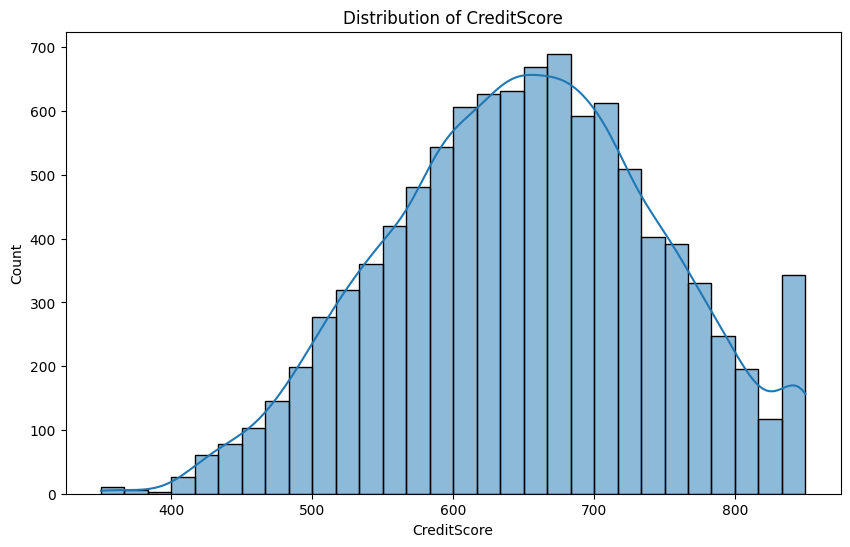

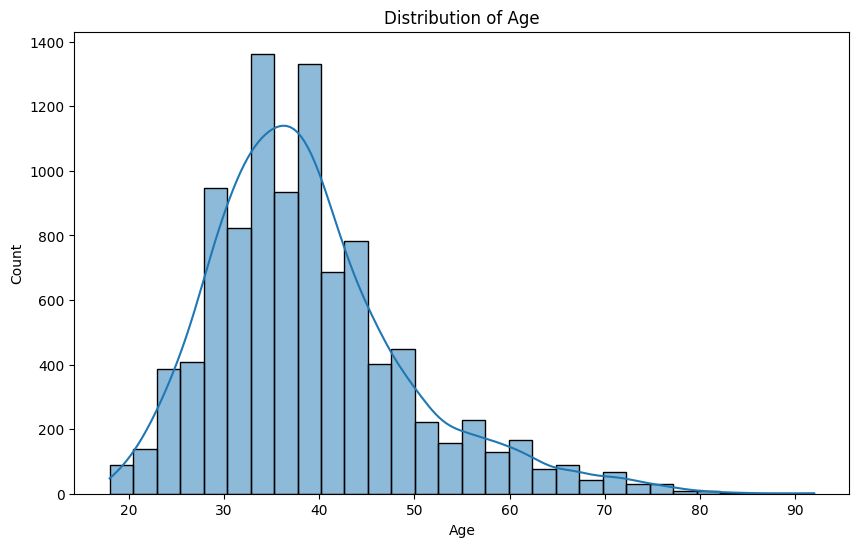

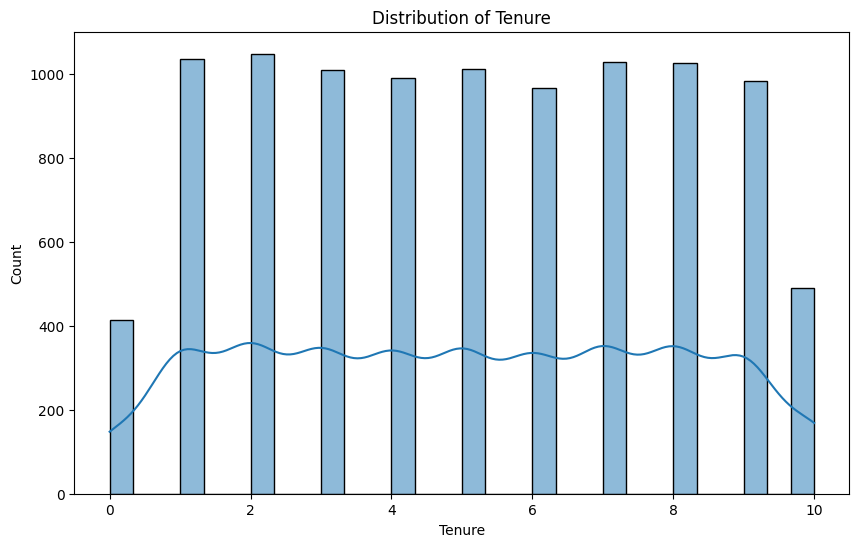

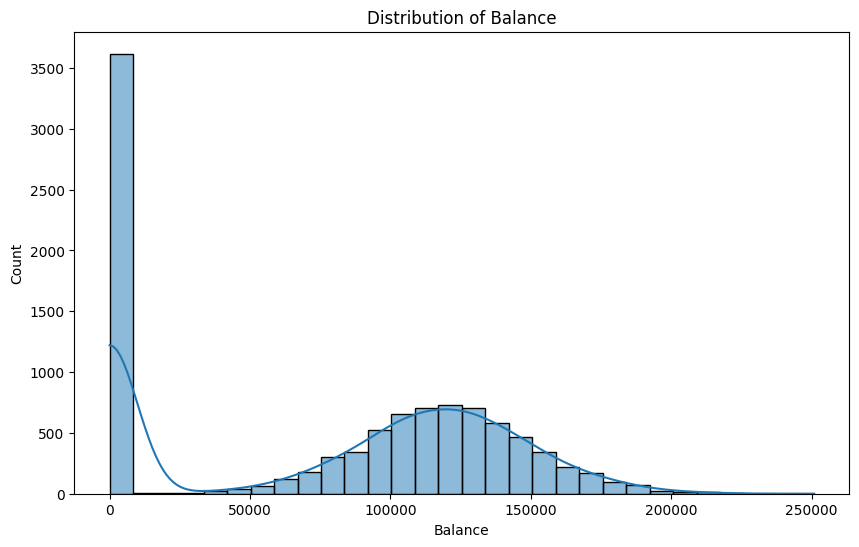

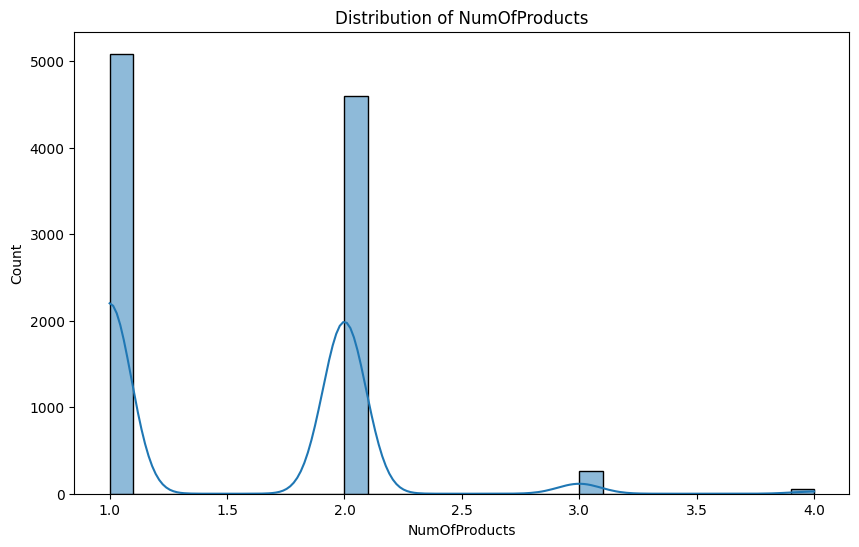

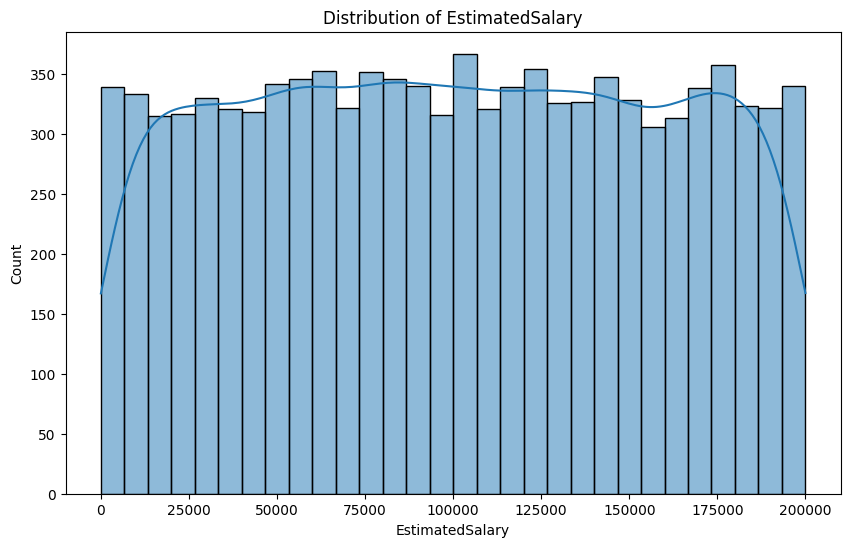

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()




In [ ]:

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# One-hot encode 'Geography' and 'Gender'
df_new= pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df_new

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
#now we are going to split data in train test and validation for final metrics of voting classifier
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5)
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_features = ['Geography', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])


In [ ]:







# Create a pipeline with feature preprocessing and Random Forest model
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier())
])

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'random_forest__n_estimators': [200,250],
    'random_forest__max_depth': [10, 8],
    'random_forest__min_samples_leaf': [2, 4],
    'random_forest__max_features': ['sqrt', 'log2'],
    'random_forest__bootstrap': [True, False],
}

# Use GridSearchCV to find the best hyperparameters for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("Best Random Forest Model Classification Report:\n", classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Best Random Forest Model Accuracy: 0.8773333333333333
Best Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1217
           1       0.77      0.49      0.60       283

    accuracy                           0.88      1500
   macro avg       0.83      0.73      0.77      1500
weighted avg       0.87      0.88      0.87      1500

Best Hyperparameters for Random Forest: {'random_forest__bootstrap': True, 'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__min_samples_leaf': 4, 'random_forest__n_estimators': 250}


In [ ]:
# pipeline_svm = Pipeline([
#     ('preprocessor', preprocessor),
#     ('svm', SVC(probability=True, random_state=101))
# ])

# # Define hyperparameter grid for SVM
# param_grid_svm = {
#     'svm__C': [1, 10,0.1],
#     'svm__kernel': ['linear', 'rbf'],
#     # 'svm__gamma': ['scale', 'auto']
# }

# # Use GridSearchCV to find the best hyperparameters for SVM
# random_search = RandomizedSearchCV(pipeline_svm, param_distributions=param_grid_svm, scoring='accuracy', random_state=101)

# # Fit the model with the best hyperparameters
# random_search.fit(X_train, y_train)

# # Get the best SVM model
# best_svm_model = random_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred_svm = best_svm_model.predict(X_test)

# # Evaluate the best model
# print("Best SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Best SVM Model Classification Report:\n", classification_report(y_test, y_pred_svm))

# # Print the best hyperparameters
# print("Best Hyperparameters for SVM:", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pipeline_log = Pipeline([
    ('preprocessor', preprocessor),  #using the preprocessor in the pipeline
    ('logreg', LogisticRegression())  # Logistic Regression classifier
])

# Defining hyperparameters grid for logistic regression
param_grid = {
    'logreg__C': [ 0.0001,0.001,0.01, 0.1, 1, 10, 100],  # Regularization parameter search space
    'logreg__penalty': ['l1', 'l2'],  # Penalty term ('l1' for lasso , 'l2' for ridge regularization)
}

grid_search_log = GridSearchCV(pipeline_log, param_grid,cv=10, scoring='accuracy')

# Fitting the model
grid_search_log.fit(X_train, y_train)

# Getting the best model
best_logreg_model = grid_search_log.best_estimator_

# Make predictions on the test set using the best model
y_pred_logreg = best_logreg_model.predict(X_test)

# Evaluate the best model
print("Best Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Best Logistic Regression Model Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search_log.best_params_)

Best Logistic Regression Model Accuracy: 0.8133333333333334
Best Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.90      1217
           1       0.54      0.08      0.14       283

    accuracy                           0.81      1500
   macro avg       0.68      0.53      0.52      1500
weighted avg       0.77      0.81      0.75      1500

Best Hyperparameters for Logistic Regression: {'logreg__C': 0.0001, 'logreg__penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


In [ ]:
from xgboost import XGBClassifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier())
])

# Defining hyperparameter search for XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__gamma': [0, 1],
    'xgb__reg_alpha': [0, 1],
    'xgb__reg_lambda': [0, 1],
}

# Using  GridSearchCV to find the best hyperparameters for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy')

# Fitting the model
grid_search_xgb.fit(X_train, y_train)

# Getting the best XGBoost model with best hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Best XGBoost Model Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Print the best hyperparameters
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)

Best XGBoost Model Accuracy: 0.8726666666666667
Best XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1217
           1       0.73      0.52      0.61       283

    accuracy                           0.87      1500
   macro avg       0.81      0.74      0.77      1500
weighted avg       0.86      0.87      0.86      1500

Best Hyperparameters for XGBoost: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}


In [ ]:
from sklearn.ensemble import  VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('random_forest', best_rf_model),
    ('gradient_boosting', best_xgb_model),
    ('svm', best_logreg_model)
], voting='soft')
voting_classifier.fit(X_train, y_train)

y_pred_voting = voting_classifier.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.866
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1217
           1       0.79      0.39      0.52       283

    accuracy                           0.87      1500
   macro avg       0.83      0.68      0.72      1500
weighted avg       0.86      0.87      0.85      1500



In [ ]:
y_eval_voting = voting_classifier.predict(X_eval)
print("Voting Classifier Accuracy:", accuracy_score(y_eval, y_eval_voting))
print("Voting Classifier Classification Report:\n", classification_report(y_eval, y_eval_voting))


Voting Classifier Accuracy: 0.848
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1211
           1       0.74      0.32      0.45       289

    accuracy                           0.85      1500
   macro avg       0.80      0.65      0.68      1500
weighted avg       0.84      0.85      0.82      1500

